# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [4]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [5]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

Saving Screenshot 2025-12-11 104257.png to Screenshot 2025-12-11 104257 (1).png
Loaded file: Screenshot 2025-12-11 104257 (1).png


In [6]:
img_rgb = Image.open(filename).convert("RGB")
img_gray = img_rgb.convert("L")
rgb_np = np.array(img_rgb)
gray_np = np.array(img_gray)
assert gray_np.ndim == 2, "gray_np must be 2D"
assert rgb_np.ndim == 3 and rgb_np.shape[2] == 3, "rgb_np must be HxWx3"
print("Image shapes - RGB:", rgb_np.shape, "Gray:", gray_np.shape)
print("Dtype:", gray_np.dtype, rgb_np.dtype)

Image shapes - RGB: (438, 665, 3) Gray: (438, 665)
Dtype: uint8 uint8


In [7]:
def gray_histogram(gray_img):
    arr = gray_img.astype(np.int32)
    rows, cols = arr.shape
    hist = np.zeros(256, dtype=np.int64)
    for i in range(rows):
        row = arr[i]
        for j in range(cols):
            val = row[j]
            if val < 0:
                val = 0
            elif val > 255:
                val = 255
            hist[val] += 1
    return hist

In [8]:
# 4) RGB histogram using loops
def rgb_histogram(rgb_img):
    arr = rgb_img.astype(np.int32)
    rows, cols, _ = arr.shape
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)
    for i in range(rows):
        row = arr[i]
        for j in range(cols):
            r, g, b = row[j]
            # clip safety (optional)
            if r < 0: r = 0
            elif r > 255: r = 255
            if g < 0: g = 0
            elif g > 255: g = 255
            if b < 0: b = 0
            elif b > 255: b = 255
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1
    return hist_r, hist_g, hist_b


In [9]:
# Computing the histograms
hist_gray = gray_histogram(gray_np)
hist_r, hist_g, hist_b = rgb_histogram(rgb_np)

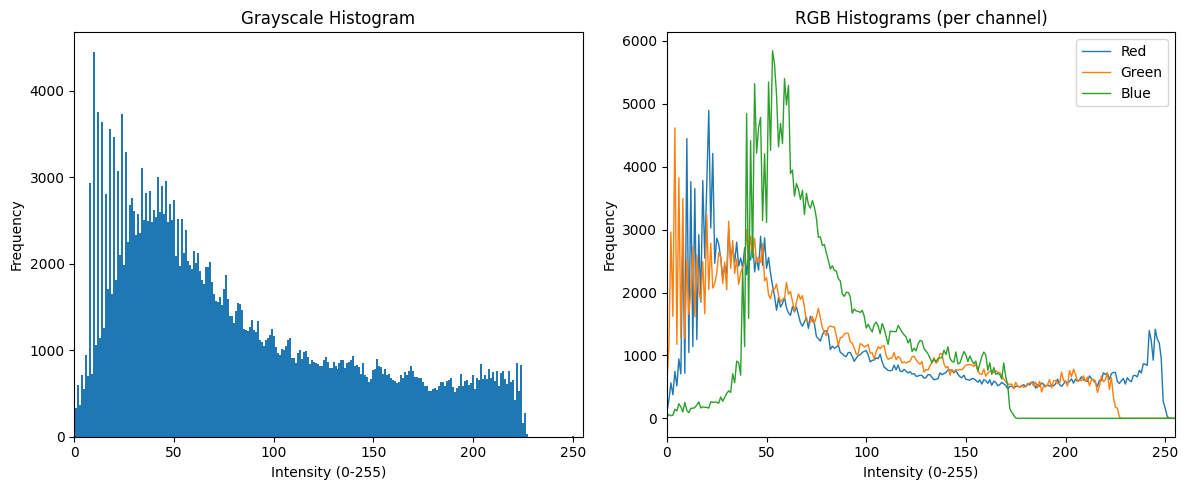

Total pixels (gray): 291270 sum(hist_gray): 291270
Total pixels (rgb): 291270 sum channels: 291270 291270 291270


In [10]:
# 5) Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(np.arange(256), hist_gray, width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Frequency")
plt.xlim([0,255])
# RGB histograms (lines)
plt.subplot(1,2,2)
x = np.arange(256)
plt.plot(x, hist_r, label='Red', linestyle='-', linewidth=1)
plt.plot(x, hist_g, label='Green', linestyle='-', linewidth=1)
plt.plot(x, hist_b, label='Blue', linestyle='-', linewidth=1)
plt.title("RGB Histograms (per channel)")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Frequency")
plt.xlim([0,255])
plt.legend()
plt.tight_layout()
plt.show()
print("Total pixels (gray):", gray_np.size, "sum(hist_gray):", hist_gray.sum())
print("Total pixels (rgb):", rgb_np.shape[0]*rgb_np.shape[1], "sum channels:", hist_r.sum(), hist_g.sum(), hist_b.sum())

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [11]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [12]:
import numpy as np
def rgb_to_hsv(rgb_img):
    rgb = rgb_img.astype(np.float32) / 255.0
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    Cmax = np.max(rgb, axis=2)
    Cmin = np.min(rgb, axis=2)
    delta = Cmax - Cmin
    H = np.zeros_like(Cmax)
    S = np.zeros_like(Cmax)
    V = Cmax * 255.0
    mask = delta != 0
    mask_r = (Cmax == R) & mask
    H[mask_r] = 60 * ((G[mask_r] - B[mask_r]) / delta[mask_r])
    mask_g = (Cmax == G) & mask
    H[mask_g] = 60 * (2 + (B[mask_g] - R[mask_g]) / delta[mask_g])
    mask_b = (Cmax == B) & mask
    H[mask_b] = 60 * (4 + (R[mask_b] - G[mask_b]) / delta[mask_b])
    H = np.mod(H, 360)
    H = H / 2.0
    S[Cmax != 0] = (delta[Cmax != 0] / Cmax[Cmax != 0]) * 255.0
    HSV = np.dstack((H, S, V)).astype(np.uint8)
    return HSV


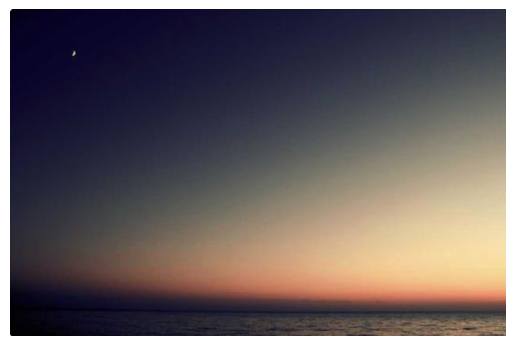

In [13]:
import cv2
hsv = rgb_to_hsv(rgb_np)
rgb_back = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_back)
plt.axis("off")
plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [14]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

FILTER 1 : SunsetBoost Filter

In [15]:
import numpy as np
import cv2
def sunset_boost(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] *= 1.4
    hsv[:,:,1] = np.clip(hsv[:,:,1], 0, 255)
    hsv[:,:,2] *= 1.2
    hsv[:,:,2] = np.clip(hsv[:,:,2], 0, 255)
    boosted = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    warm = boosted.astype(np.float32)
    warm[:,:,0] *= 1.03
    warm[:,:,1] *= 0.95
    warm[:,:,2] *= 1.15
    warm = np.clip(warm, 0, 255)
    return warm.astype(np.uint8)


I used saturation boost and brightness increase to enhance warm tones typical in sunset
and beach images. I also added a red tint using channel multipliers to emphasize warm
colors. This filter works best on golden-hour or outdoor images because these tones
respond strongly to saturation + warm shifts.


FILTER 2: CyberCool Filter

In [16]:
def cyber_cool(img):
    rgb = img.astype(np.float32)
    alpha = 1.35
    beta = -25
    contrast_img = rgb * alpha + beta
    contrast_img = np.clip(contrast_img, 0, 255).astype(np.uint8)
    hsv = cv2.cvtColor(contrast_img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,0] = (hsv[:,:,0] + 15) % 180
    hsv = np.clip(hsv, 0, 255)
    rotated = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    blue = rotated.astype(np.float32)
    blue[:,:,0] *= 1.20
    blue[:,:,1] *= 1.05
    blue = np.clip(blue, 0, 255)
    return blue.astype(np.uint8)


I used contrast boost + brightness shift to give a high-dynamic cyberpunk feel. Then I
rotated the hue in HSV and added a blue-tint to push colors into a futuristic style.
This filter works well on night-time or city street images with many lights and neon.


Displaying the Original vs Filtered(Instagram par bhi h ye dono)

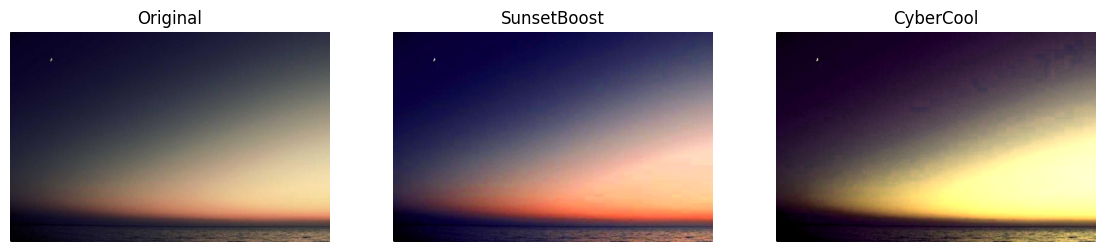

In [17]:
import matplotlib.pyplot as plt
filtered1 = sunset_boost(rgb_np)
filtered2 = cyber_cool(rgb_np)
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.imshow(rgb_np)
plt.title("Original")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(filtered1)
plt.title("SunsetBoost")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(filtered2)
plt.title("CyberCool")
plt.axis("off")
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [18]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [19]:
import numpy as np
def white_patch_balance(img_rgb):
    img = img_rgb.astype(np.float32)
    max_val = np.max(img)
    if max_val == 0:
        return img_rgb.copy()
    scale = 255.0 / max_val
    corrected = img * scale
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    return corrected


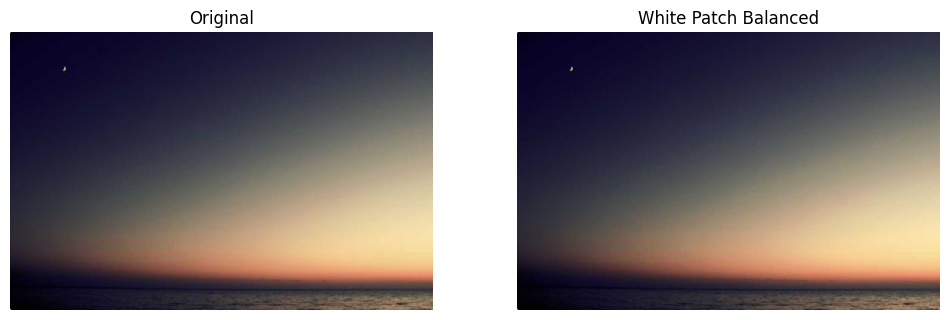

In [20]:
corrected_img = white_patch_balance(rgb_np)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(rgb_np)
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(corrected_img)
plt.title("White Patch Balanced")
plt.axis("off")
plt.show()


White Patch assumes the brightest point in the image should be pure white.
We find the global maximum pixel value and scale the whole RGB image so that
this pixel becomes 255. This removes color cast and increases overall brightness.


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [21]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [22]:
import numpy as np
import cv2
def white_balance(img_rgb, value):
    img = img_rgb.astype(np.float32)
    t = (value - 0.5) * 2.0
    red_shift  = 1 + 0.4 * t
    blue_shift = 1 - 0.4 * t
    result = img.copy()
    result[:,:,0] *= blue_shift
    result[:,:,2] *= red_shift
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result


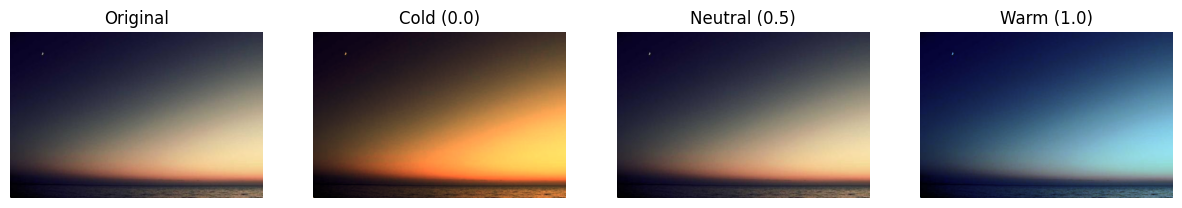

In [23]:
cold  = white_balance(rgb_np, 0.0)
mid   = white_balance(rgb_np, 0.5)
warm  = white_balance(rgb_np, 1.0)
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(rgb_np)
plt.title("Original")
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(cold)
plt.title("Cold (0.0)")
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(mid)
plt.title("Neutral (0.5)")
plt.axis("off")
plt.subplot(1,4,4)
plt.imshow(warm)
plt.title("Warm (1.0)")
plt.axis("off")
plt.show()


The white balance slider adjusts color temperature by shifting the red and blue
channels. Lower values enhance blue (cool tone), and higher values enhance red
(warm tone). A linear interpolation between cold and warm gives smooth control,
similar to camera white balance behavior.
